In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [128]:
df_profit_state = pd.read_csv('data/quarterly/profit.csv', index_col=0)
df_profit_private = pd.read_csv('data/quarterly/private_profit.csv', index_col=0)
df_assets_state = pd.read_csv('data/quarterly/total_assets.csv', index_col=0)
df_assets_private = pd.read_csv('data/quarterly/private_total_assets.csv', index_col=0)

numeric_cols = df_profit_state.select_dtypes(include=np.number).columns.tolist()
df_profit_state['profit_state'] = (df_profit_state[numeric_cols].sum(axis=1) - df_profit_state['privatbank']) / 5

numeric_cols_2 = df_profit_private.select_dtypes(include=np.number).columns.tolist()
df_profit_private['profit_private'] = df_profit_private[numeric_cols_2].sum(axis=1) / 13

numeric_cols = df_assets_state.select_dtypes(include=np.number).columns.tolist()
df_assets_state['assets_state'] = (df_assets_state[numeric_cols].sum(axis=1) - df_assets_state['privatbank']) / 5

numeric_cols_2 = df_assets_private.select_dtypes(include=np.number).columns.tolist()
df_assets_private['assets_private'] = df_assets_private[numeric_cols_2].sum(axis=1) / 13

df_profit = pd.DataFrame({
    'state': df_profit_state['profit_state'],
    'private': df_profit_private['profit_private'],
    'privatbank': df_profit_state['privatbank']
})
df_assets = pd.DataFrame({
    'state': df_assets_state['assets_state'],
    'private': df_assets_private['assets_private'],
    'privatbank': df_assets_state['privatbank']
})

df_roa = (df_profit / df_assets) * 100

start_date = '2023-01-01'
end_date = '2023-12-31'

df_roa = df_roa.loc[start_date:end_date]
print(df_roa)

print(df_roa['state'].mean())
print(df_roa['private'].mean())
print(df_roa['privatbank'].mean())

               state   private  privatbank
date                                      
2023-03-31  0.546450  0.750175    1.400278
2023-06-30  1.063353  1.731441    3.362248
2023-09-30  2.478784  2.884431    4.959679
2023-12-31  2.433405  3.484650    5.535306
1.6304977296690586
2.212674293958011
3.814377925197196


In [129]:
df_profit_state = pd.read_csv('data/quarterly/profit.csv', index_col=0)
df_profit_private = pd.read_csv('data/quarterly/private_profit.csv', index_col=0)
df_equity_state = pd.read_csv('data/quarterly/total_equity_capital.csv', index_col=0)
df_equity_private = pd.read_csv('data/quarterly/private_equity_capital.csv', index_col=0)

numeric_cols = df_profit_state.select_dtypes(include=np.number).columns.tolist()
df_profit_state['profit_state'] = (df_profit_state[numeric_cols].sum(axis=1) - df_profit_state['privatbank']) / 5

numeric_cols_2 = df_profit_private.select_dtypes(include=np.number).columns.tolist()
df_profit_private['profit_private'] = df_profit_private[numeric_cols_2].sum(axis=1) / 13

numeric_cols = df_equity_state.select_dtypes(include=np.number).columns.tolist()
df_equity_state['equity_state'] = (df_equity_state[numeric_cols].sum(axis=1) - df_equity_state['privatbank']) / 5

numeric_cols_2 = df_equity_private.select_dtypes(include=np.number).columns.tolist()
df_equity_private['equity_private'] = df_equity_private[numeric_cols_2].sum(axis=1) / 13

df_profit = pd.DataFrame({
    'state': df_profit_state['profit_state'],
    'private': df_profit_private['profit_private'],
    'privatbank': df_profit_state['privatbank']
})
df_equity = pd.DataFrame({
    'state': df_equity_state['equity_state'],
    'private': df_equity_private['equity_private'],
    'privatbank': df_equity_state['privatbank']
})

df_roe = (df_profit / df_equity) * 100
start_date = '2023-01-01'
end_date = '2023-12-31'

df_roe = df_roe.loc[start_date:end_date]
print(df_roe)

print(df_roe['state'].mean())
print(df_roe['private'].mean())
print(df_roe['privatbank'].mean())

                state    private  privatbank
date                                        
2023-03-31  10.418509   7.327371   15.341189
2023-06-30  18.623306  16.091622   40.846203
2023-09-30  35.229048  24.873207   49.340593
2023-12-31  35.075295  29.015987   51.714631
24.836539550816106
19.327046727775958
39.31065393393935


In [130]:
df_profit_combined = pd.concat([df_profit_state, df_profit_private], axis=1)
df_equity_combined = pd.concat([df_equity_state, df_equity_private], axis=1)
df_assets_combined = pd.concat([df_assets_state, df_assets_private], axis=1)

In [131]:
numeric_cols_1 = df_profit_combined.select_dtypes(include=np.number).columns.tolist()
df_profit_combined['profit_combined'] = df_profit_combined[numeric_cols_1].sum(axis=1) / 19

numeric_cols_2 = df_assets_combined.select_dtypes(include=np.number).columns.tolist()
df_assets_combined['assets_combined'] = df_assets_combined[numeric_cols_2].sum(axis=1) / 19

df_roa_total = (df_profit_combined['profit_combined'] / df_assets_combined['assets_combined']) * 100
print(df_roa_total)

date
2020-03-31    0.654935
2020-06-30    1.314795
2020-09-30    1.606565
2020-12-31    1.939888
2021-03-31    0.321527
2021-06-30    1.033795
2021-09-30    1.967287
2021-12-31    2.911683
2022-03-31    0.242271
2022-06-30   -0.282685
2022-09-30    0.156942
2022-12-31    0.534360
2023-03-31    0.850877
2023-06-30    1.919291
2023-09-30    3.285489
2023-12-31    3.660041
2024-03-31    0.857777
2024-06-30    1.813988
dtype: float64


In [132]:
numeric_cols_1 = df_profit_combined.select_dtypes(include=np.number).columns.tolist()
df_profit_combined['profit_combined'] = df_profit_combined[numeric_cols_1].sum(axis=1) / 19

numeric_cols_2 = df_equity_combined.select_dtypes(include=np.number).columns.tolist()
df_equity_combined['equity_combined'] = df_equity_combined[numeric_cols_2].sum(axis=1) / 19

df_roe_total = (df_profit_combined['profit_combined'] / df_equity_combined['equity_combined']) * 100
print(df_roe_total)


date
2020-03-31     7.464973
2020-06-30    15.722613
2020-09-30    19.717697
2020-12-31    22.934227
2021-03-31     3.800389
2021-06-30    13.033836
2021-09-30    22.591602
2021-12-31    30.634009
2022-03-31     2.559872
2022-06-30    -3.418371
2022-09-30     1.908539
2022-12-31     7.327859
2023-03-31    10.987305
2023-06-30    24.352852
2023-09-30    36.099482
2023-12-31    39.031700
2024-03-31     9.457794
2024-06-30    20.223205
dtype: float64


In [133]:
df_roa_privatbank = (df_profit_combined['privatbank'] / df_assets_combined['privatbank']) * 100
df_roa_privatbank

date
2020-03-31    1.443226
2020-06-30    2.914531
2020-09-30    3.143754
2020-12-31    4.258406
2021-03-31    0.311986
2021-06-30    1.590193
2021-09-30    3.407300
2021-12-31    5.027218
2022-03-31    0.554636
2022-06-30    0.689525
2022-09-30    1.862166
2022-12-31    3.289058
2023-03-31    1.400278
2023-06-30    3.362248
2023-09-30    4.959679
2023-12-31    5.535306
2024-03-31    1.058478
2024-06-30    2.395476
Name: privatbank, dtype: float64

In [134]:
def create_hist_roa(bank, df, total_df):
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Bar plot
    plt.bar(pd.to_datetime(df.keys()), df.values, width=20, align='center', color='blue', alpha=0.7, label='Bar Plot')

    # Line plot
    plt.plot(pd.to_datetime(df.keys()), total_df.values, color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Line Plot')

    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title('Combined Plot: Bar and Line')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Display the plot
    plt.show()

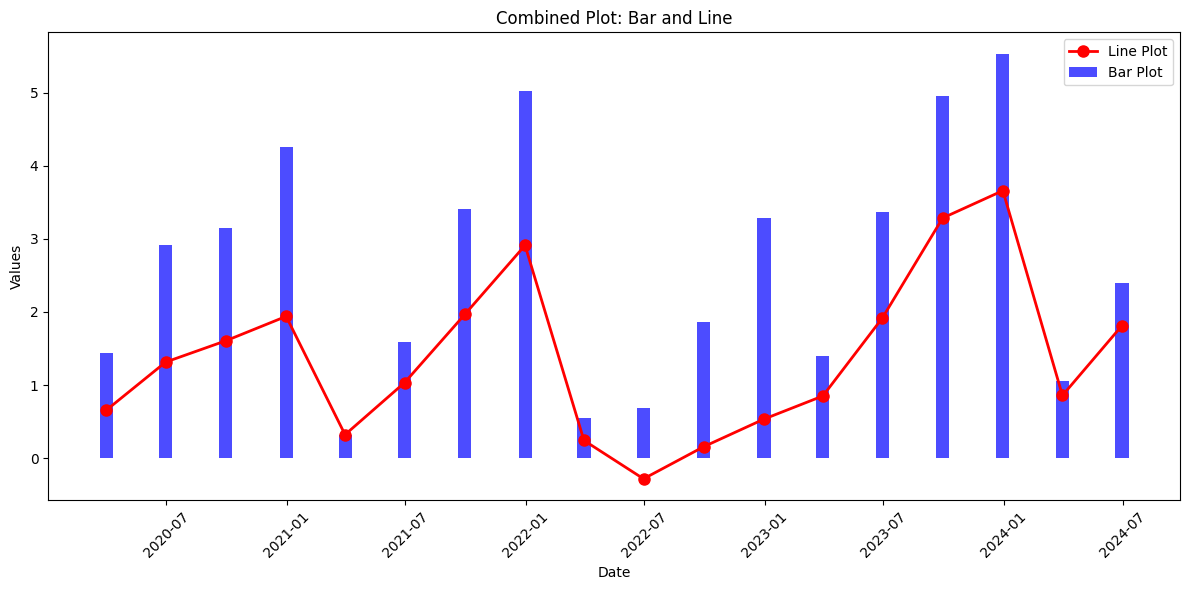

In [135]:
create_hist_roa('Приватбанк', df_roa_privatbank, df_roa_total)